In [21]:
import numpy as np

grid_size = (5,5,5)
n_points = np.prod(grid_size)
params = np.zeros(np.prod(grid_size)*3)
for i, p in enumerate(np.ndindex(grid_size)):
    params[i] = p[2]
    params[n_points + i] = p[1]
    params[2*n_points + i] = p[0]

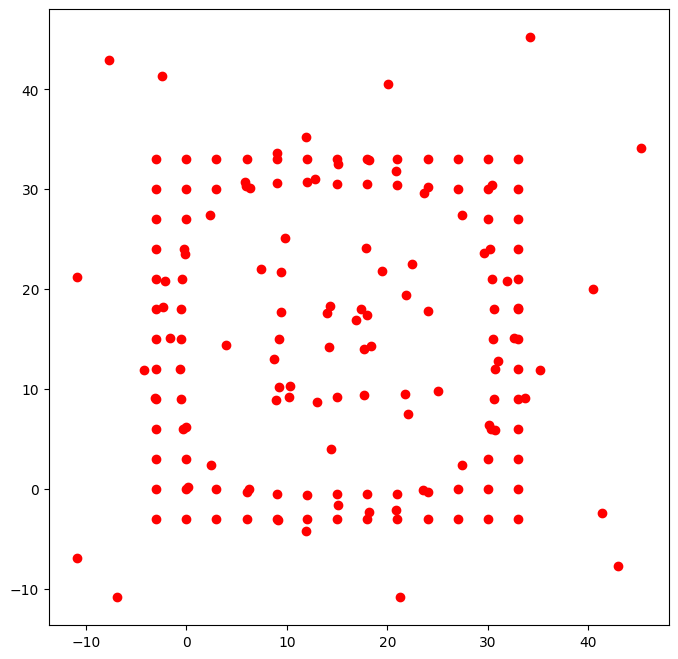

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

x = np.loadtxt("points.txt")
spacing = [3, 3, 3]
size = [13, 13, 13]
slice = 6

plt.figure(figsize=(8,8))
for p in x:
    if p[2] == slice:
        plt.scatter(p[3], p[4], c="r")

In [19]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [25]:
xs = []
ys = []
labels = []
slice = 6

with open("points_slice.txt", 'w') as f:
    for p in x:
        if p[2] == slice:
            xs.append(p[3])
            ys.append(p[4])
            labels.append(f"{p[0]} {p[1]}")
            f.write(f"{p[3]} {p[4]} \n")

fig = px.scatter(x=xs, y=ys, hover_name=labels, width=1000, height=1000)
fig.show()

In [26]:
from thesispy.elastix_wrapper.wrapper import get_run_result
from pathlib import Path
from thesispy.definitions import *

transform_params_path = Path("/home/joasiee/Documents/projects/elastix/experiments/output/1665151686_synthetic_1_adaptivestochasticgradientdescent_883071/out/TransformParameters.0.txt")
run_result = get_run_result(Collection.SYNTHETIC, 1, transform_params_path)
dvf = run_result.dvf

In [27]:
from thesispy.experiments.validation import plot_dvf

dvf[15,13,15]

array([-0.50488609,  0.84070832, -0.50488609])

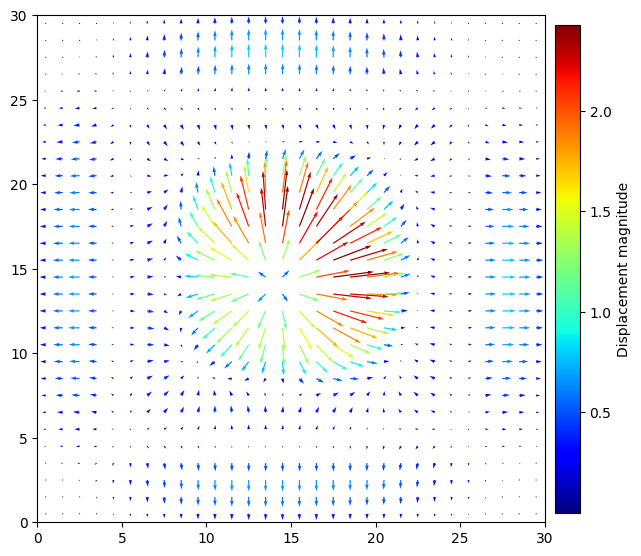

In [32]:
plot_dvf(dvf, slice=6)

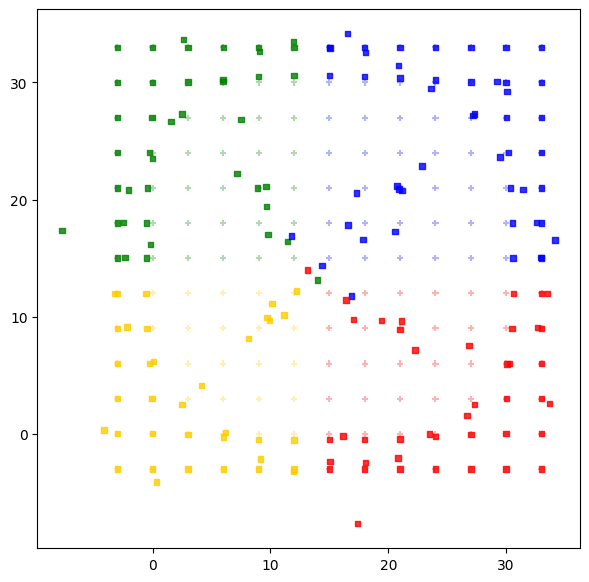

In [34]:
from thesispy.experiments.validation import plot_cpoints

spacing = np.array([3,3,3])
origin = np.array([-3.5,-3.5,-3.5])
plot_cpoints(run_result.control_points, spacing, origin, slice=7)